In [1]:
import numpy as np
import pandas as pd
from platform import python_version
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from datetime import date
from datetime import datetime

## Create function to count number of elements equal to given value in a series

In [2]:
def counter(x,y):
    """counter function, not used in this program"""
    i=0
    for z in x.values.tolist():
        if z==y:
            i+=1
    return i

## City dictionary definition, and functions for loading data, showing data, performing analysis, and plotting

In [3]:
#City dictionary with keys defined by interactive user input
citydict = {'chicago':'chicago.csv','new york':'new_york_city.csv','washington':'washington.csv'}

In [4]:
def loaddata():
    """
    loads data based on user-specified city
    args: 
        nothing (asked internally)
    return: 
        (df) city data
        (str) city name
    """
    fileexists = False
    while fileexists==False:
        try:
            city = input('Which city: Chicago, New York, or Washington?\n')
            city = city.lower()
            file1 = pd.read_csv(citydict[city])
            dataframe = pd.DataFrame(data=file1)
            fileexists = True
        except KeyError:
                print('try again (check spelling)')
    
    return dataframe,city

In [5]:
def showdata(x):
    """
    shows data
    args: 
        city dataframe
    return: 
        five rows of data, with option to continue
    """
    yesno = input('show some data (yes/no)?')
    i=0
    more=yesno
    if yesno=='yes':
        display(x[i:i+5])
        i+=5
        more = input('more (yes/no)?\n')
        while more=='yes' and ((i+5) <= x.shape[0]):
            display(x[i:i+5])
            i+=5
            more = input('more (yes/no)?\n')

In [6]:
class question_one:
    
    def __init__(self): 
        """create dictionary, load data, add miscellaneous time columns"""
        timesdict = {'month':'month','day of week':'dayofweek','hour':'hour'}
        citydata,city = loaddata()

        citydata['year'] = pd.to_datetime(citydata['Start Time']).dt.year  #.values.tolist())
        citydata['month'] = pd.to_datetime(citydata['Start Time']).dt.month_name()   
        citydata['day'] = pd.to_datetime(citydata['Start Time']).dt.day   
        citydata['hour'] = pd.to_datetime(citydata['Start Time']).dt.hour   
        citydata['dayofweek'] = pd.to_datetime(citydata['Start Time']).dt.day_name()   

        self.data = citydata
        self.dict = timesdict
    
    def querydata(self):
        """get most popular time
        args: 
            self.data (DataFrame)
            self.dict (dict)
        return:
            print statistics (str)
        """
        keyexists = False
        while keyexists==False:
            try:
                times = input("Most common month (enter 'month'), day of week (enter 'day of week'), or hour of day (enter 'hour')?\n")
                time = self.data[self.dict[times]].value_counts()
                keyexists = True
            except KeyError:
                print('try again (check spelling)')
            
        print('Most popular ' + times + ': ' + str(time.index[0]))


In [7]:
class question_two:

    def __init__(self): 
        """load data, establish dictionary"""
        citydata,city = loaddata()
        self.data = citydata
        self.dict = {'start':'Start Station','end':'End Station','route':['Start Station','End Station']}
        
    def querydata(self):
        """1. does key exist, 2. if so, group and count
        args:
            self.data (DataFrame)
            self.dict (dict)
        return: 
            print statistics (str)
        """
        keyexists = False
        while keyexists==False:
            try:
                stationin = input("Most common start station (enter 'start'), end station (enter 'end'), or route (enter 'route')?\n")
                location = self.data.groupby(self.dict[stationin])['Start Time'].count().reset_index(name='Count').sort_values('Count',ascending=False)
                keyexists = True
            except KeyError:
                print('try again (check spelling)')

        self.stationin = stationin
        self.location = location
        
        print('Most popular ' + str(self.dict[stationin]) + ':\n' + str(location[self.dict[stationin]].iloc[0]))
    
    def plot(self):
        """plot route info
        args:
            self.stationin (str)
            self.location (DataFrame)
        return:
            station plot
        """
        if self.stationin=='route':
            data1 = self.location['Start Station'][0:5]+ '-> '+ self.location['End Station'][0:5]
            data2 = self.location['Count'][0:5]
        else:
            data1 = self.location[self.dict[self.stationin]][0:5]
            data2 = self.location['Count'][0:5]
    
        fig,ax = plt.subplots(figsize=(12,8))

        ax.set_xlabel(self.stationin)
        ax.set_ylabel('number of trips')
        ax.set_xticks(np.arange(0, len(data1), 1))
        ax.set_xticklabels(data1[0:len(data1)],rotation=45)

        ax.bar(data1,data2,width=0.1)
        ax.set_title('most common ' + self.stationin)
        plt.subplots_adjust(bottom=0.4)
        plt.savefig('stations.png')


In [8]:
class question_three:
    
    def __init__(self): 
        """load data"""
        citydata,city = loaddata()
        self.data = citydata
        
    def stats(self):
        """calculate trip duration statistics
        args:
            self.data (dataframe)
        return:
            print statistics (str)
        """

        meantrip = citydata['Trip Duration'].mean()
        mediantrip = citydata['Trip Duration'].median()
        modetrip = citydata['Trip Duration'].mode()
        totaltrip = citydata['Trip Duration'].sum()

        self.meantrip = meantrip
        self.mediantrip = mediantrip
        
        print('Average trip duration:\n',meantrip,'seconds') 
        print('Total trip duration:\n',totaltrip,'seconds') 
        
    def plot(self):
        """plot mean and median trip statistics
        args: 
            self.meantrip (float)
            self.mediantrip (float)
        return:
            mean/median plot
        """
        
        trip = [self.meantrip,self.mediantrip]

        fig,ax = plt.subplots(1,1,figsize=(12,8))

        X = np.arange(0,2)
        ax.bar(X,trip,width=0.5,color='blue')
        #ax[0].bar(X,nyc_trip[0],width=0.1,color='fuchsia')
        #ax[0].bar(X+0.25,wash_trip[0],width=0.1,color='orange')
        ax.set_xticks(X)
        ax.set_xticklabels(['mean','median','mode'])
        ax.set_ylabel('seconds')
        ax.legend([city])
        #plt.subplots_adjust(bottom=0.3)
        #plt.xticks(X,['avg trip','total trip'])
        #ax[1].bar(X-0.25,chi_trip[1],width=0.1,color='blue')
        #ax[1].bar(X,nyc_trip[1],width=0.1,color='fuchsia')
        #ax[1].bar(X+0.25,wash_trip[1],width=0.1,color='orange')
        #ax[1].set_xticks(X)
        #ax[1].set_xticklabels(['total trip'])
        #ax[1].set_ylabel('seconds')
        #ax[1].legend(['chicago','nyc','washington'])
        plt.suptitle('trip duration')

        #plt.show()
        plt.savefig('tripstats.png')
        self.plot = plt.savefig('tripstats.png')

In [9]:
class question_four:
    
    def __init__(self): 
        """load data"""
        citydata,city = loaddata()
        self.data = citydata
        
    def stats(self):
        """calculate trip duration statistics
        args:
            self.data (DataFrame)
        return:
            print statistics (str)
        """
        
        user_type = self.data['User Type'].value_counts()
        print('User type counts:\n',user_type)

        #calculate counts of gender, if available
        try:
            gender = self.data['Gender'].value_counts()
            print('Gender counts:\n',gender)
        except KeyError:
            print('Gender data not available')

        #calculate birth year statistics, if available
        try:
            youngest = self.data['Birth Year'].max()
            #recent = self.data.dropna().sort_values('Birth Year',ascending=False)
            oldest = self.data['Birth Year'].min()
            #oldest = self.data.dropna().sort_values('Birth Year')
            #common = self.data.groupby(['Birth Year'])['Start Time'].count().reset_index(name='Count').sort_values('Count',ascending=False)
            #common = self.data['Birth Year'].mode()
            common = self.data['Birth Year'].value_counts()
            #counter(self.data['Birth Year'],1987)
            print('Oldest user birth year:\n',oldest)
            print('Youngest user birth year:\n',youngest)
            print('Most common user birth year:\n',common.index[0]) 
        except KeyError:
            print('Birth year data not available')

## Load a city, show the data

In [10]:
citydata,city = loaddata()

Which city: Chicago, New York, or Washington?
 chicago


In [11]:
print('Rows of data: '+str(citydata.shape[0]))

Rows of data: 300000


In [12]:
showdata(citydata)

show some data (yes/no)? no


## Ask for which data questions the user wants answers to

In [13]:
#generate a dictionary for which question user wants to answer
questiondict = {'when':'one','where':'two','how long':'three','user':'four'}

In [14]:
#ask for user input on which question to answer
keyexists = False
while keyexists==False:
    try:
        questionin = input("Which data about a city bikeshare would you like to see?\n \
                          1. When people use it (enter 'when')\n \
                          2. Where people go (enter 'where')\n \
                          3. How long people travel (enter 'how long')\n \
                          4. User demographics (enter 'user')\n")
        question = questiondict[questionin]
        keyexists = True
    except KeyError:
        print('try again (check spelling)')

Which data about a city bikeshare would you like to see?
                           1. When people use it (enter 'when')
                           2. Where people go (enter 'where')
                           3. How long people travel (enter 'how long')
                           4. User demographics (enter 'user')
 how long


# 1. Popular times of travel (i.e., occurs most often in the start time)

* most common month
* most common day of week
* most common hour of day

# 2. Popular stations and trip

* most common start station
* most common end station
* most common trip from start to end (i.e., most frequent combination of start station and end station)

# 3. Trip duration

* total travel time
* average travel time

# 4. User info

* counts of each user type
* counts of each gender (only available for NYC and Chicago)
* earliest, most recent, most common year of birth (only available for NYC and Chicago)

Which city: Chicago, New York, or Washington?
 chicago


,Unnamed: 0,Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Gender,Birth Year
0,1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992.0
1,955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992.0
2,9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981.0
3,304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986.0
4,45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975.0
...,...,...,...,...,...,...,...,...,...
299995,64825,2017-01-21 13:18:00,2017-01-21 13:27:50,590,Orleans St & Elm St (*),Sheffield Ave & Webster Ave,Subscriber,Male,1965.0
299996,695993,2017-04-28 19:32:19,2017-04-28 19:51:18,1139,Ashland Ave & Blackhawk St,Clark St & Elm St,Customer,NaN,NaN
299997,159685,2017-02-12 09:59:01,2017-02-12 10:21:49,1368,Ravenswood Ave & Lawrence Ave,Stockton Dr & Wrightwood Ave,Subscriber,Female,1988.0
299998,564681,2017-04-16 17:07:15,2017-04-16 17:19:00,705,Sheffield Ave & Willow St,Clark St & Chicago Ave,Customer,NaN,NaN


Average trip duration:
 936.23929 seconds
Total trip duration:
 280871787 seconds


ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (3).

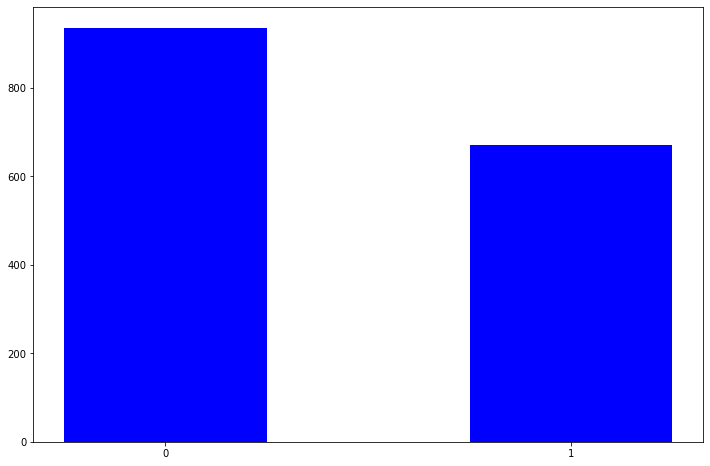

In [15]:
#load data for a city, then perform analysis for given question
#driver of program
if question=='one':
    yy = question_one()
    display(yy.data)
    yy.querydata()
elif question=='two':
    yy = question_two()
    display(yy.data)
    yy.querydata()
    yy.plot()
elif question=='three':
    yy = question_three()
    display(yy.data)
    yy.stats()   
    yy.plot()
elif question=='four':
    yy = question_four()
    display(yy.data)
    yy.stats()   